In [2]:
import pandas as pd

In [3]:
path = '/content/drive/MyDrive/ML projects/decision tree/voice.csv'

In [4]:
data = pd.read_csv(path)

In [5]:
data.head(2)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.0,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.0,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male


In [6]:
data.shape

(3168, 21)

In [7]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [8]:
feature = data.iloc[:,0:19]
label = data.iloc[:,20]

In [9]:
from sklearn.model_selection import train_test_split

trainF,testF,trainL,testL = train_test_split(feature,label,test_size = .2)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
model = DecisionTreeClassifier(max_depth=15)

In [24]:

model.fit(trainF,trainL)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
pred = model.predict(testF)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(testL,pred))

              precision    recall  f1-score   support

      female       0.95      0.98      0.96       298
        male       0.98      0.96      0.97       336

    accuracy                           0.97       634
   macro avg       0.96      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



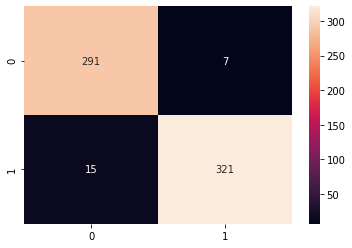

In [30]:
import seaborn as sea
sea.heatmap(confusion_matrix(testL,pred),annot=True,fmt='d')